(chap:9-solow)=
# ソロー・モデル

<div name="html-admonition" style="font-size: 0.8em">
<input type="button" onclick="location.href='https://translate.google.com/translate?hl=&sl=ja&tl=en&u='+window.location;" value="Google translation" style="color:#ffffff;background-color:#008080; height:25px" onmouseover="this.style.background='#99ccff'" onmouseout="this.style.background='#008080'"/> in English or the language of your choice.
</div><br>

In [1]:
import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import py4macro
import statsmodels.formula.api as smf

# numpy v1の表示を使用
np.set_printoptions(legacy='1.21')
# 警告メッセージを非表示
import warnings
warnings.filterwarnings("ignore")

## はじめに

前章では差分方程式について説明し，簡単な経済モデルを使いコードの書き方を説明した。本章では，差分方程式の応用となるソロー・モデルを考える。ソロー・モデルは1987年にノーベル経済学賞を受賞した[Robert M. Solow](https://www.nobelprize.org/prizes/economic-sciences/1987/press-release/)によって考案された経済成長モデルであり，マクロ経済学の代表的な理論モデルの一つである。今でも盛んに研究が続く経済成長のバックボーン的な存在である。モデルの説明の後，`Python`を使い動学的な特徴を明らかにし，線形近似を使った安定性の確認もおこなう。また理論的な予測がデータと整合性があるかについてもPenn World Tableを使って検討する。本章の内容は次章で議論する所得収斂の分析の基礎となる。

## モデルの説明

ここではモデルの具体的な説明については教科書に譲るとして，簡単にモデルを紹介し，重要な式をまとめることにする。

＜記号＞
* 産出量：$Y_t$
* 消費量：$C_t$
* 投資量：$I_t$
* 資本ストック：$K_t$
* 労働：$L_t$
* 貯蓄率（一定な外生変数）：$0<s<1$
* 労働人口増加率（一定な外生変数）：$n\equiv\dfrac{L_{t+1}}{L_t}-1\geq 0$
* 資本減耗率（一定な外生変数）：$0<d<1$
* 生産性（一定な外生変数）：$A>0$

＜一人当たりの変数＞
* 一人当たり産出量：$y_t\equiv\dfrac{Y_t}{L_t}$
* 一人当たり消費量：$c_t\equiv\dfrac{C_t}{L_t}$
* 一人当たり投資量：$i_t\equiv\dfrac{I_t}{L_t}$
* 一人当たり資本ストック：$k_t\equiv\dfrac{K_t}{L_t}$

全ての市場は完全競争である閉鎖経済を考えよう。この経済には一種類の財（ニューメレール財）しかなく，消費・貯蓄・投資に使われる。財は次の生産関数に従って生産される。

$$
Y_t=AK_t^aL_t^{1-a},\quad 0<a<1
$$ (eq:8-production_level)

両辺を$L_t$で割ると一人当たりの変数で表した生産関数となる。

$$
y_t=Ak_t^a
$$ (eq:8-production)

消費者は所得の割合$s$を貯蓄するが，このモデルの中で消費者の役割はこれだけであり，残り全ては生産側で決定される。貯蓄は$sY_t$であり投資$I_t$と等しくなる。

$$
sY_t=I_t
$$ (eq:8-syi)

$t$期の投資により$t+1$期の資本ストックは増加するが，毎期ごと資本は$d$の率で減耗する。即ち，投資と資本ストックには次の関係が成立する。

$$
K_{t+1}-K_{t}=I_t-dK_t
$$ (eq:8-kk)

ここで左辺は資本ストックの変化であり，右辺は純投資である。$I_t$は粗投資，$dK_t$は減耗した資本である。式[](eq:8-syi)，[](eq:8-kk)，[](eq:8-production)を使うと資本の蓄積方程式が導出できる。

$$
K_{t+1} = sAK_t^aL^{1-a} + (1-d)K_t
$$ (eq:8-kkdot)

両辺を$L_t$で割ることで一人当たりの変数で表すことができる。右辺は単純に一人当たりの変数に直し，左辺は次のように書き換えることに注意しよう。

$$
\frac{K_{t+1}}{L_t}=\frac{K_{t+1}}{L_{t+1}}\frac{L_{t+1}}{L_t}
=k_{t+1}(1+n)
$$

従って，$t+1$期の一人当たりの資本ストックを決定する式は次式で与えられる。

$$
k_{t+1} = \frac{sAk_t^a + (1-d)k_t}{1+n}
$$ (eq:8-kdot)

この式は非線形の差分方程式だが，前章でも述べたように，考え方は線形差分方程式と同じであり，数値計算のための`Python`コードに関しては大きな違いはない。また式[](eq:8-kdot)を資本ストックの成長率を示す式に書き換えることもできる。

$$
\frac{k_{t+1}}{k_t}-1 = \frac{sAk_t^{-(1-a)}-(n+d)}{1+n}
$$ (eq:8-kgrowth)

この式から資本が蓄積され$k_t$が増加すると，その成長率は減少していくことが分かる。

産出量の動学は生産関数[](eq:8-production)を使うことによって$y_t$の動きを確認できる。例えば，産出量の成長率を考えてみよう。式[](eq:8-production)を使うと

$$
\frac{y_{t+1}}{y_t}-1
=\left(\frac{k_{t+1}}{k_t}\right)^{\alpha}-1
$$ (eq:8-ygrowth)

となり，一人当たり資本ストックの成長率と同じような動きをすることが分かると思う。

次に定常状態を考えよう。定常状態では資本ストックは一定なり，資本の成長率である式[](eq:8-kgrowth)の右辺はゼロになる。
定常値は次のように確認することができる。

$$
\begin{align*}
\frac{k_*}{k_*}-1 
&=\frac{sAk_*^{-(1-a)} - (n+d)}{1+n} \\
&\Downarrow \\
k_*
&=\left(
        \frac{As}{n+d}
    \right)^{\frac{1}{1-a}}
\end{align*}
$$ (eq:8-kss)

この値を生産関数[](eq:8-production)に代入することにより一人当たりGDPの定常値を求めることができる。

$$
y_*=Ak_*^{a}
$$ (eq:8-yss)

{numref}`fig:8-solow`は資本ストックの動学的均衡を示している。

```{figure} /images/solow.jpeg
---
scale: 30%
name: fig:8-solow
---
一人当たり資本ストックの動学
```

## 動学

差分方程式[](eq:8-kdot)を使って資本ストックの変化をプロットするが，以前と同じように`DataFrame`を生成する関数を定義しよう。

In [2]:
def solow_model(k0, A=10, a=0.3, s=0.3, n=0.02, d=0.05, T=100):
    """引数
            k0: 資本の初期値
            A: 生産性
            a: 資本の所得比率 (a<1)
            s: 貯蓄率 (s<1)
            n: 労働人口成長率（％）
            d: 資本減耗率 (d<1)
            T: ループによる計算回数
       戻り値
            資本と産出量からなるDataFrame"""
    
    k = k0
    y = A * k0**a
    
    k_lst = [k]
    y_lst = [y]

    for t in range(T):
        
        k = ( s * A * k**a + (1-d) * k )/( 1+n )
        y = A * k**a

        k_lst.append(k)
        y_lst.append(y)

    # DataFrameの作成
    dic = {'capital':k_lst, 'output':y_lst}
    df = pd.DataFrame(dic)
    
    return df 

引数に使うパラーメータには次の値を使ってプロットしてみよう。

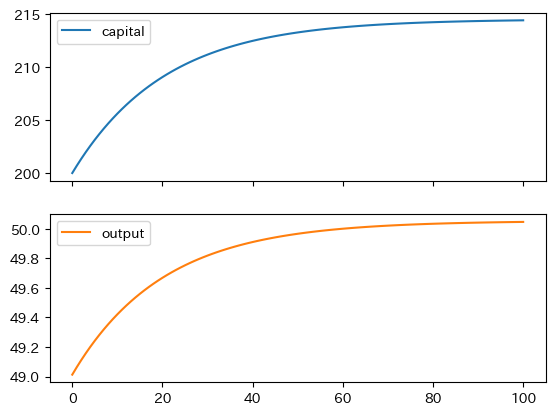

In [3]:
df = solow_model(k0=200)
df.plot(subplots=True)
pass

異なる初期値を使って資本の変化をプロットしてみる。

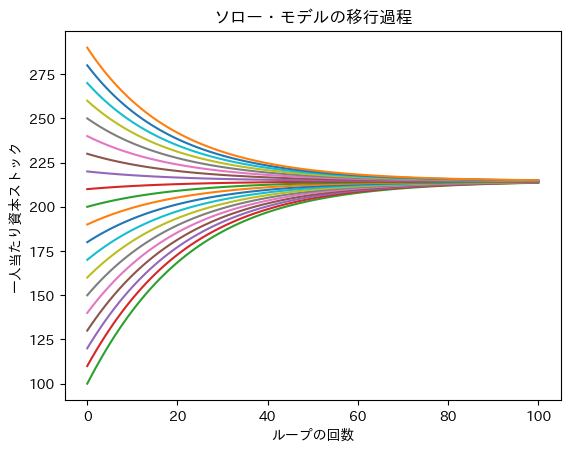

In [4]:
initial_lst = range(100,300,10)      # 1

ax = pd.DataFrame({'capital':[],
                   'output':[]}).plot(legend=False)  # 2

for i in initial_lst:                 # 3
    
    solow_model(k0=i).plot(y='capital', legend=False, ax=ax)
    
ax.set(title='ソロー・モデルの移行過程',  # 4
       xlabel='ループの回数',
       ylabel='一人当たり資本ストック')
pass

````{admonition} コードの説明
:class: dropdown

* `#1`：`range(100,300,10)`は100から300-1=299までの間の数を10間隔で生成する。100，110，120，$cdots$，290となる。
* `#2`：空の`DataFrame`を使って空の軸を作成し，`ax`に割り当てる。
* `#3`：`initial_list`に対して`for`ループを設定する。一回のループごとに以下をおこなう。
    * `i`は`k0`の引数に使う値になる。
    * `.plot()`を使い`ax`に図をプロットする。これにより図が重ねて描かれる。
* `#4`：`ax`のメソッド`set()`を使い，引数を使い以下を追加する。
    * `title`：図のタイトル
    * `xlabel`：横軸のラベル
    * `ylabel`：縦軸のラベル
    * この３行を次のように書いても同じ結果となる。
        ```
        ax.set_title('ソロー・モデルの移行過程')
        ax.set_xlabel('ループの回数')
        ax.set_ylabel('一人当たり資本ストック')
        ```
      この３つを`.set()`でまとめて書いたのが上のコードである。３つに分けて書く利点はフォントの大きさを指定できることだろう。
````

図から初期値に関わらず定常値に収束していることが分かる。即ち，定常状態である長期均衡は安定的である。

## 定常状態での変数の値

次に定常状態での変数の値を計算してみよう。

In [5]:
def calculate_steady_state(A=10, a=0.3, s=0.3, n=0.02, d=0.05):
    
    k_ss = ( s * A / (n+d) )**( 1/(1-a) )    
    y_ss = A * k_ss**( a/(1-a) )    
    
    return k_ss, y_ss

In [6]:
ss = calculate_steady_state()

print(f'定常状態での資本ストック:{ss[0]:.1f}'
      f'\n定常状態での産出量: {ss[1]:.1f}')

定常状態での資本ストック:214.5
定常状態での産出量: 99.8


## 線形近似

### 説明

{numref}`fig:8-solow`は，定常状態は安定的であることを示している。またシミュレーションの結果からも定常状態の安定性が確認できる。次に，線形近似を使って解析的に安定性を確認してみることにする。また線形近似は真の値からの乖離が発生するが，その乖離がどの程度のものかをコードを使って計算することにする。

＜テイラー展開による１次線形近似＞
* 関数$z=f(x)$を$x_*$でテイラー展開すると次式となる。

    $$
    z=f(x^*)+\left.\frac{df}{dx}\right|_{x=x_*}(x-x_*)
    $$

ソロー・モデルの式に当てはめると次のような対応関係にある。
* $z\;\Rightarrow\;k_{t+1}$
* $f(x)\;\Rightarrow\;\dfrac{Ask_{t}^{\alpha}+(1-d)k_t}{1+n}$
* $x^*\;\Rightarrow\;k^*$

公式に従って計算してみよう。

$$
\begin{align*}
k_{t+1}
&=\frac{Ask_{*}^{\alpha}+(1-d)k_*}{1+n}
+\frac{1}{1+n}\left[\frac{Asa}{k_t^{1-\alpha}}+(1-d)\right]_{k_t=k_*}(k_t-k_*) \\
&=k_{*}
+\frac{1}{1+n}\left[\frac{Asa}{k_*^{1-\alpha}}+(1-d)\right](k_t-k_*) \\
&=k_*+\frac{1}{1+n}\left[\frac{Asa}{As/(n+d)}+(1-d)\right](k_t-k_*) \\
&=k_*+\frac{a(n+d)+1-d-n+n}{1+n}(k_t-k_*) \\
&=k_*+\frac{1+n-(1-a)(n+d)}{1+n}(k_t-k_*) \\
&=(1-\lambda) k_t + \lambda k_*
\end{align*}
$$ (eq:8-kapprox)

ここで

$$
\lambda\equiv \frac{(1-a)(n+d)}{1+n}
$$ (eq:8-lambda)

３行目は定常状態の式[](eq:8-kdot)と式[](eq:8-kss)を使っている。式[](eq:8-kapprox)は$k_{t+1}$と$k_t$の線形差分方程式になっており，$k_t$の係数は

$$
0<1-\lambda<1
\quad\because
0<a,d<1
$$ (eq:8-coef_of_kt)

が成立する。{numref}`fig:8-solow`の赤い直線が式[](eq:8-kapprox)である。従って，初期値$k_0>0$からスタートする経済は必ず長期的均衡に収束することがわかる。

式[](eq:8-lambda)は$k_t$の係数だが，その裏にあるメカニズムを考えてみよう。特に，$a$の役割を考える。$a$は資本の所得比率であり，目安の値は1/3である。そしてソロー・モデルにおける重要な役割が**資本の限界生産性の逓減**を決定することである。この効果により資本ストックが増加する毎に産出量も増加するがその増加自体が減少する。この効果により，{numref}`fig:8-solow`の曲線は凹関数になっており，生産関数[](eq:8-production)の場合は必ず45度線と交差することになる。即ち，資本の限界生産性の逓減こそが$k_t$が一定になる定常状態に経済が収束す理由なのである。この点がソロー・モデルの一番重要なメカニズムとなる。

ここで$a$が上昇したとしよう。そうなると資本の限界生産性の逓減の効果は弱くなり，資本ストックが増加しても産出量の増加自体の減少は小さくなる。また式[](eq:8-kss)が示すように定常状態での資本ストックはより大きくなる。これは{numref}`fig:8-solow`で曲線が上方シフトしている考えると良いだろう。

```{admonition} 内生的成長
:class: note
更に$a$を上昇させて$a=1$になるとどうなるのだろう。この場合，資本の限界生産性は逓減せず一定となる。そして$k_t$の係数である式[](eq:8-coef_of_kt)は1になってしまい，$k_t$が一定になる定常状態が存在しなくなる。$a=1$となる極限の状態を内生的成長と呼ぶ。ここでは立ち入った議論はしないが，内生的成長の典型的な生産関数は次式となり，

$$y_t=Ak_t$$

この生産関数に基づくモデルは$AK$モデルと呼ばれる。資本の限界生産性は$A$で一定になることが分かると思う。
```

### $\lambda$の解釈

上の議論から$\lambda$が定常状態の安定性を決定することが分かったが，$\lambda$の値はどのように解釈できるだろうか。例えば，$\lambda$が大きい場合と小さい場合では何が違うのだろうか。次式は式[](eq:8-kapprox)の最後の等号を少し書き換えたものである。

$$
k_*-k_{t+1}=(1-\lambda)(k_*-k_t)
$$ (eq:8-approx_lastline)

左辺は$t+1$期において定常状態までの残りの「距離」であり，右辺の$k_*-k_t$は$t$においての定常状態までの残りの「距離」である。後者を次の様に定義し

$$z_t\equiv k_*-k_t$$

式[](eq:8-approx_lastline)を整理すると次式となる。

$$
\frac{z_{t+1}-z_t}{z_t}=-\lambda
$$ (eq:8-kspeed)

左辺は$t$期と$t+1$期において定常状態までの「距離」が何％減少したかを示す**資本ストックの収束速度**である。このモデルの中での収束速度の決定要因は資本の所得比率$\alpha$，労働人口増加率$n$と資本の減耗率$d$ということである。

ここでは$a$の役割に着目し，なぜ$a$の上昇は収束速度の減少をもたらすのかを直感的に考えてみよう。この点を理解するために，まず$a$は資本の限界生産性の逓減を決定するパラーメータであることを思い出そう。$a$が上昇するとその効果は弱まる。即ち，資本ストックが１単位増加すると産出量は増え，その増加分が減少するのが「逓減」であるが，その減少が小さくなるのである。これにより（上で説明したように）$k_t$が一定となる定常状態は増加することになる。重要な点は，定常状態の増加の意味である。定常状態はマラソンのゴールの様なものである。トップランナーはゴールすると走るのを止め，後続ランナーはトップランナーとの「距離」を縮めることができる。定常状態の増加は，ゴールが遠くなることと同じである。ゴールが遠のくとトップランナーは走り続けるわけだから，それだけ距離を縮めることが難しくなり収束速度が減少することになる。極端なケースとして$a=1$の場合，$k_t$が一定になる定常状態は存在せず，ゴールがない状態が永遠に続いており，永遠に収束しないということである。言い換えると，資本の限界生産性の逓減（$a<1$）こそが「距離」を縮めキャッチアップを可能にするメカニズムなのだ。

労働人口増加率$n$と資本の減耗率$d$の上昇は収束速度を速くする。式[](eq:8-kss)から分かる様に，$n$もしくは$d$の上昇は定常状態を減少させる。即ち，ゴールはより近くになるということだ。

これである程度キャッチアップのメカニズムが分かったと思うが，今までの議論で足りないものが２点あるので，それらについて簡単に言及する。第一に，ここで考えたソロー・モデルには技術進歩が抜けている（一定な$A$を仮定した）。この点を導入してこそソロー・モデルのフルバージョンであり，その場合の労働効率１単位当たり資本ストック（$K_t/(A_tL_t)$）の収束速度は次の式で与えられる。

$$
\lambda\equiv \frac{(1-a)(g+n+d+ng)}{(1+n)(1+g)}
$$ (eq:8-lambda_g)

ここで$g$は技術進歩率である。ソロー・モデルでは4つの変数が収束速度の決定要因になるる。$g=0$の場合，式[](eq:8-lambda)と同じになることが確認できる。第二に，式[](eq:8-lambda)は資本ストックの収束速度であり一人当たりGDPの収束速度と異なるのではないかという疑問である。実は同じである。これはコブ・ダグラス生産関数[](eq:8-production)を仮定しているからであり，対数の近似を使えば簡単に示すことができる。式[](eq:8-approx_lastline)を次のように書き直そう。

$$
\frac{k_{t+1}}{k_*}-1=(1-\lambda)\left(\frac{k_t}{k_*}-1\right)
$$ (eq:8-ks_rewrite)

ここで$\log(1+x-1)\approx x-1$の近似を使い左辺を次のように書き換える。

$$
\frac{k_{t+1}}{k_*}-1
\approx\log\left(\frac{k_{t+1}}{k_*}\right)
=\log\left(\frac{y_{t+1}}{y_*}\right)^{\frac{1}{\alpha}}
=\frac{1}{\alpha}\left(\frac{y_{t+1}}{y_*}-1\right)
$$

同様に$\dfrac{k_{t}}{k_*}-1$もこの形に書き換えることができる。後はこの関係を使うことにより，式[](eq:8-ks_rewrite)を整理すると次式となる。

$$
y_*-y_{t+1}=(1-\lambda)(y_*-y_t)
$$ (eq:8-y_difference_eq)

式[](eq:8-approx_lastline)と同じ形になっているので所得の収束速度も式[](eq:8-kspeed)と同じである。

### 線形近似による誤差

次に関数`solow_model()`を修正して線形近似の誤差を確かめてみよう。

In [7]:
def solow_model_approx(k0, A=10, a=0.3, s=0.3, n=0.02, d=0.05, T=20):
    """引数
            k0: 資本の初期値
            A: 生産性
            a: 資本の所得比率 (a<1)
            s: 貯蓄率 (s<1)
            n: 労働人口成長率（n>=0）
            d: 資本減耗率 (d<1)
            T: ループによる計算回数
       戻り値
            線形近似モデルを使い計算した資本と産出量からなるDataFrame"""
    
    k = k0
    y = A * k0**a
    
    k_lst = [k]
    y_lst = [y]

    # 定常状態
    k_ss = ( s*A / (n+d) )**( 1 / (1-a) )    
    
    for t in range(T):
        
        lamb = 1 - (1-a) * (n+d) / (1+n)  # lambda
        k = lamb*k + (1-lamb) * k_ss  # 線形近似
        y = A * k**a

        k_lst.append(k)
        y_lst.append(y)

    # DataFrameの作成
    dic = {'capital':k_lst, 'output':y_lst}
    df = pd.DataFrame(dic)
    
    return df

近似誤差を計算するために，上と同じ数値でシミュレーションをおこなう。

In [8]:
df_approx = solow_model_approx(k0=200, T=150)

非線形のモデル[](eq:8-kdot)と線形近似のモデル[](eq:8-kapprox)で計算された資本ストックを重ねて図示してみよう。

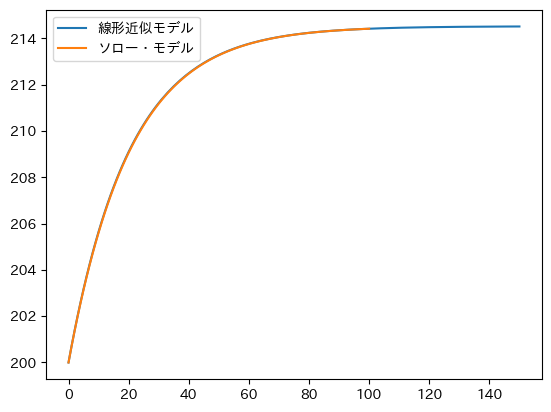

In [9]:
ax = df_approx.plot(y='capital', label='線形近似モデル')
df.plot(y='capital', label='ソロー・モデル', ax=ax)
pass

`df_approx`が図示され、その上に`df`が重ねて表示されるが、殆ど同じのように見える。誤差を％で計算し図示してみよう。

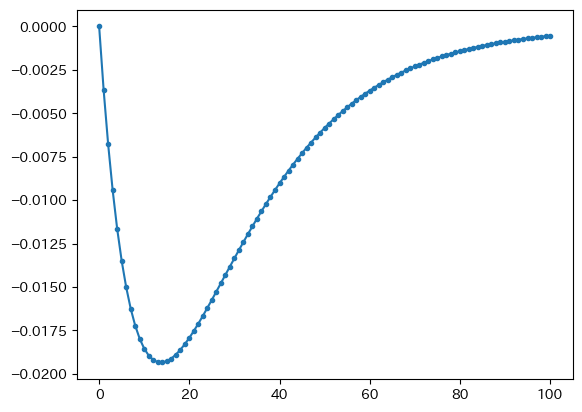

In [10]:
( 100*( 1-df_approx['capital']/df['capital'] ) ).plot(marker='.')
pass

初期の資本ストック$k_0$は同じなので誤差はゼロであり，$t=1$から線形近似の誤差が現れることになる。誤差は単調ではない。{numref}`fig:8-solow`の図が示しているように，階段のような形で増加していくためであり，その階段お大きさや進み具合が異なるためである。線形近似の値は大き過ぎるため負の値になっているが、誤差は大きくても約0.02％であり、定常状態に近づくにつれて誤差はゼロに近づいている。もちろん，誤差の値は初期値が定常値から離れればそれだけ大きくなっていく。

## 長期均衡の予測

### 説明

In [22]:
from myst_nb import glue
pwt = py4macro.data('pwt')
latest_year = int( pwt['year'].max() )
glue("latest_year_glued", latest_year)

ModuleNotFoundError: No module named 'myst_nb'

この節では長期均衡（定常状態）に焦点を当て，理論的な予測のデータとの整合性をチェックする。まず定常状態の特徴をまとめよう。式[](eq:8-kss)と[](eq:8-yss)を使いうと定常状態での一人当たり資本ストックとGDPは次式で与えれる。

$$
k_*=
\left(
     \frac{sA}{n+d}
\right)^{\frac{1}{1-a}},
\quad
y_*=Ak_*^a
$$

この２つをそれぞれ試すこともできるが，同時に捉えるために２つの式の比率を考える。

$$
\frac{k_*}{y_*}=\frac{s}{n+d}
=\left.\frac{K_t/L_t}{Y_t/L_t}\right|_{\text{定常状態}}
=\left.\frac{K_t}{Y_t}\right|_{\text{定常状態}}
$$ (eq:8-kyratio)

この値は資本ストック対GDP比と等しいく，次のことが分かる。
* 貯蓄率$s$の上昇は資本ストック対GDP比を増加させる。。
* 労働人口成長率$n$の上昇は資本ストック対GDP比を減少させる。
* 資本減耗率$d$の上昇は資本ストック対GDP比を減少させる。

この３つの予測が成立するか確かめるために`py4macro`モジュールに含まれるPenn World Tableの次の変数を使う。
* `cgdpo`：GDP（{glue:text}`latest_year_glued`年;生産側）
* `cn`：物的資本ストック（{glue:text}`latest_year_glued`年）
* `csh_i`：対GDP比資本形成の比率
    * 投資の対GDP比である。
    * 貯蓄率$s$の代わりに使う。
    * 1960年〜{glue:text}`latest_year_glued`年の平均を使う。
* `emp`：雇用者数
    * 労働人口の代わりに使う。
    * 1960年〜{glue:text}`latest_year_glued`年の平均成長率$n$の計算に使う。
* `delta`：資本ストックの年平均減耗率
    * 1960年〜{glue:text}`latest_year_glued`年の平均を使う。

### データ

(sec:8-data)=
### データ

1960年以降のデータを`pwt`に割り当てる。

In [2]:
pwt = py4macro.data('pwt').query('year >= 1960')

また、後で使うために、{glue:text}`latest_year_glued`年を変数`latest_year`に割り当てよう。

In [23]:
latest_yr = pwt['year'].max()
latest_yr

2023

#### 貯蓄率

1960年から{glue:text}`latest_year_glued`年までの国別の貯蓄率の平均を計算するが必要がある。[ここで説明している](https://py4basics.github.io/3_Pandas.html#id33)`DataFrame`のメソッド`.groupby()`を使うのが最も簡単な計算方法だろう。ここでは異なる方法として`DataFrame`のメソッド`.pivot()`を紹介する。`.pivot()`はデータを整形する上で非常に便利なメソッドなので知って損はないだろう。

`.pivot()`は，元の`DataFrame`から列を選び，その列から新たな`DataFrame`を作成する便利なメソッドである。実際にコードを実行して説明しよう。

In [3]:
saving = pwt.pivot(index='year', columns='country', values='csh_i')
saving.head()

country,Albania,Algeria,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1960,NaN,0.292292,NaN,NaN,NaN,0.140910,NaN,NaN,0.336618,0.207003,...,NaN,0.239277,0.230340,0.144855,NaN,0.358695,NaN,NaN,0.050083,0.189235
1961,NaN,0.334405,NaN,NaN,NaN,0.149655,NaN,NaN,0.296569,0.205342,...,NaN,0.241543,0.231433,0.154907,NaN,0.338576,NaN,NaN,0.046848,0.181016
1962,NaN,0.372550,NaN,NaN,NaN,0.132196,NaN,NaN,0.317393,0.187515,...,NaN,0.225732,0.236722,0.133602,NaN,0.349284,NaN,NaN,0.042926,0.128391
1963,NaN,0.355781,NaN,NaN,NaN,0.112345,NaN,NaN,0.309578,0.184681,...,NaN,0.225506,0.239582,0.122253,NaN,0.320073,NaN,NaN,0.031393,0.111248
1964,NaN,0.267336,NaN,NaN,NaN,0.137489,NaN,NaN,0.332907,0.207555,...,NaN,0.268017,0.240732,0.100760,NaN,0.389544,NaN,NaN,0.020332,0.114591


```{admonition} コードの説明
:class: dropdown

`pwt`の３つの列`year`，`country`，`csh_i`を使って新たな`DataFrame`を作成し`saving`に割り当てている。引数は次の役割をする。
* `index`：新たな`DataFrame`の**行ラベル**を指定する。
    * コードでは`year`が指定され行ラベルになっている。
* `columns`：新たな`DataFrame`の**列ラベル**を指定する。
    * コードでは`country`が指定され列ラベルになっている。
* `values`：新たな`DataFrame`の**値**を指定する。
    * コードでは`csh_i`が指定され，その値で`DataFrame`が埋め尽くされている。
```

1960年以降欠損値がない国だけを使うことにしよう。`NaN`がある列を削除する必要があるので`.dropna()`を使う。

In [4]:
saving = saving.dropna(axis='columns')
saving.head()

country,Algeria,Argentina,Australia,Austria,Bangladesh,Barbados,Belgium,Benin,Bolivia (Plurinational State of),Botswana,...,Tunisia,Türkiye,U.R. of Tanzania: Mainland,Uganda,United Kingdom,United States,Uruguay,Venezuela (Bolivarian Republic of),Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1960,0.292292,0.140910,0.336618,0.207003,0.014559,0.090716,0.274124,0.039017,0.206834,0.102649,...,0.112642,0.196667,0.104302,0.098392,0.239277,0.230340,0.144855,0.358695,0.050083,0.189235
1961,0.334405,0.149655,0.296569,0.205342,0.017380,0.079419,0.294998,0.037919,0.163327,0.124339,...,0.146735,0.199453,0.117391,0.113316,0.241543,0.231433,0.154907,0.338576,0.046848,0.181016
1962,0.372550,0.132196,0.317393,0.187515,0.026159,0.073334,0.280298,0.037577,0.267985,0.143526,...,0.187319,0.197619,0.099309,0.115779,0.225732,0.236722,0.133602,0.349284,0.042926,0.128391
1963,0.355781,0.112345,0.309578,0.184681,0.018701,0.078361,0.269299,0.038658,0.227549,0.158613,...,0.192624,0.200368,0.088076,0.143015,0.225506,0.239582,0.122253,0.320073,0.031393,0.111248
1964,0.267336,0.137489,0.332907,0.207555,0.023628,0.076604,0.303141,0.032848,0.231306,0.195691,...,0.206365,0.197618,0.116514,0.182406,0.268017,0.240732,0.100760,0.389544,0.020332,0.114591


```{admonition} コードの説明
:class: dropdown

`.dropna()`は`NaN`がある行か列を削除する。行と列のどちらを削除するかは引数`axis`で指定するが，デフォルトは`'rows'`である。即ち，引数なしで`.dropna()`を実行すると`NaN`がある行が削除される。ここでは列を削除したいので，引数に`'columns'`を指定している。
```

AlbaniaやAngolaなどが削除されていることが確認できる。何ヵ国残っているか確認してみよう。

In [5]:
saving.shape

(64, 111)

```{admonition} コードの説明
:class: dropdown

属性`.shape`は`DataFrame`の行の数（左の数字）と列（右の数字）の数を返す。
```

111ヵ国含まれていることが確認できた。次に，それぞれの列の平均を計算する。

In [6]:
saving = saving.mean().to_frame('saving_rate')   # 1
saving.head()

,saving_rate
country,
Algeria,0.340081
Argentina,0.146066
Australia,0.277670
Austria,0.272072
Bangladesh,0.143379


````{admonition} コードの説明
:class: dropdown

1. `.mean()`はそれぞれの列の平均を計算し，`Series`を返す。後で`DataFrame`を結合するメソッド`.merge()`を使うために`.to_frame()`を使って`Series`を`DataFrame`に変換しており，引数`saving_rate`は列ラベルを指定している。もちろん引数を使わずに２行に分けることも可能である。
```
saving = saving.mean().to_frame()
saving.columns = ['saving_rate']
```
````

```{tip}
上の計算では1960年以降に欠損値が一つでもあればその国は排除されたが，全ての年でデータが揃っている経済だけを扱いたい場合に便利に使える方法である。一方で，`.groupby()`を使うと欠損値があっても平均は計算されるので，単純に`.groupby()`を使うと1960年以降に欠損値がある経済も含まれることになる。それを避けるためには一捻り必要だが，それについては[](sec:9-saving)が参考になるだろう。
```

#### 資本減耗率

`saving`と同じ方法で資本減耗率の平均からなる`DataFrame`を作成する。

In [7]:
depreciation = pwt.pivot(index='year', columns='country', values='delta')
depreciation = depreciation.dropna(axis='columns')

In [8]:
depreciation.shape

(64, 110)

110ヵ国含まれている。

In [9]:
depreciation = depreciation.mean().to_frame('depreciation')

#### 労働人口成長率

平均成長率を計算するには1960年と{glue:text}`latest_year_glued`年の労働人口だけで計算できるが，上と同じ方法で計算してみる。

In [10]:
emp = pwt.pivot(index='year', columns='country', values='emp')
emp = emp.dropna(axis='columns')

In [20]:
emp.shape

(60, 91)

91ヵ国しか含まれていない。

In [25]:
emp_growth = ( ( emp.loc[latest_yr,:]/emp.loc[1960,:] )**(1/(len(emp)-1))-1 
             ).to_frame('employment_growth')
emp_growth.head()

,employment_growth
country,
Algeria,0.029506
Argentina,0.017632
Australia,0.019195
Austria,0.005053
Bangladesh,0.021290


#### 資本ストック対GDP比

{glue:text}`latest_year_glued`年の`cgdpo`と`cn`を使って資本ストック対GDP比を含む`DataFrame`を作成する。

In [27]:
ky_ratio = pwt.query('year == @latest_yr') \
              .loc[:,['country','cgdpo','cn']] \
              .set_index('country') \
              .dropna()
ky_ratio.head()

,cgdpo,cn
country,,
Aruba,4823.155273,2.274172e+04
Angola,225950.187500,7.037451e+05
Anguilla,327.047302,4.200483e+03
Albania,44771.500000,2.628630e+05
United Arab Emirates,816201.875000,5.953914e+06


```{admonition} コードの説明
:class: dropdown
* `@`を使うことにより，`.query()`の外で定義された変数`latest_yr`を`.query()`の引数の文字列の中でそのまま使えるようなる。
* `.set_index(''country')`を使って`country`を行ラベルに指定し，`.dropna()`によって欠損値がある行は削除する。
```

資本ストック対GDP比の列の作成しよう。

In [28]:
ky_ratio['ky_ratio'] = np.log( ky_ratio['cn'] / ky_ratio['cgdpo'] )

含まれる国数を確認する。

In [29]:
ky_ratio.shape

(180, 3)

180ヵ国含まれており，`saving`や`depreciation`の国数よりも多くの国が含まれている。

#### データの結合

上で作成した`DataFrame`を結合する必要があり，そのための`DataFrame`のメソッド`.merge()`の使い方を説明する。`df_left`と`df_right`の２つの`DataFrame`があるとしよう。`df_left`を左の`DataFrame`，`df_right`を右の`DataFrame`と呼ぶことにする。`df_left`のメソッド`.merge()`を使い`df_right`と結合する場合，次のコードとなる。
```
df_left.merge(df_right) 
```
しかし注意が必要な点が２つある。
1. 行数が同じでも`df_left`と`df_right`では行の並びが異なる可能性がある。
2. 行数が異なる可能性がある。

これらの問題に対応するためのる引数が用意されている。

まず１つ目の問題は，ある列を基準列もしくは行ラベルに合わせて行を並び替えることにより対応できる。例えば，上で作成した`DataFrame`であれば，行ラベルが`country`になっているので，それに合わせて結合すれば良い。その場合の引数を含めたコードは次の様になる。
```
df_left.merge(df_right, left_index=True, right_index=True) 
```
ここでの`left_index=True`と`right_index=True`は行ラベルを基準に結合することを指定しており，デフォルトは両方とも`False`である。行ラベルではなく，ある列を基準に結合した場合もあるだろう。その場合は次の引数を使う。
```
df_left.merge(df_right,
              left_on=＜`df_left`の基準列のラベル（文字列）＞,
              right_on=＜`df_right`の基準列のラベル（文字列）＞) 
```
`left_on`は基準列に使う左の`DataFrame`にある列ラベルを文字列で指定する。同様に`right_on`は基準列に使う右の`DataFrame`にある列ラベルを文字列で指定する。デフォルトは両方とも`None`となっている。

２つ目の問題は`how`という引数を使うことにより対処できる。使える値は次の４つであり，いずれも文字列で指定する。
* `'inner'`：`df_left`と`df_right`の両方の基準列にある共通の行だけを残す（デフォルト）。
* `'left'`：`df_left`の行は全て残し，`df_right`からはマッチする行だけが残り，対応する行がない場合は`NaN`が入る。
* `'right'`：`df_right`の行は全て残し，`df_left`からはマッチする行だけが残り，対応する行がない場合は`NaN`が入る。
* `'outer'`：`df_left`と`df_right`の両方の行を全て残し，マッチする行がない場合は`NaN`を入れる。

では実際に上で作成した`DataFrame`を結合しよう。

上で作成した`DataFrame`を結合する必要があり，そのための`Pandas`の関数`.merge()`の使い方を説明する。`df_left`と`df_right`の２つの`DataFrame`があるとしよう。`df_left`を左の`DataFrame`，`df_right`を右の`DataFrame`と呼ぶことにする。２つを結合する場合，次のコードとなる。
```
pd.merge(df_left, df_right) 
```
しかし注意が必要な点が２つある。
1. 行数が同じでも`df_left`と`df_right`では行の並びが異なる可能性がある。
2. 行数が異なる可能性がある。

これらの問題に対応するためのに引数が用意されている。

まず１つ目の問題は，行ラベルを基準に，もしくはある列に合わせて行を並び替えることにより対応できる。例えば，上で作成した`DataFrame`であれば，行ラベルが`country`になっているので，それに合わせて結合すれば良い。その場合の引数を含めたコードは次の様になる。
```
pd.merge(df_left, df_right, left_index=True, right_index=True) 
```
ここでの`left_index=True`と`right_index=True`は行ラベルを基準に結合することを指定しており，デフォルトは両方とも`False`である。行ラベルではなく，ある列を基準に結合したい場合もあるだろう。その場合は次の引数を使う。
```
pd.merge(df_left, df_right,
         left_on=＜`df_left`の基準列のラベル（文字列）＞,
         right_on=＜`df_right`の基準列のラベル（文字列）＞) 
```
`left_on`は基準列に使う`df_left`にある列ラベルを文字列で指定する。同様に`right_on`は基準列に使う`df_right`にある列ラベルを文字列で指定する。デフォルトは両方とも`None`となっている。

２つ目の問題は`how`という引数を使うことにより対処できる。使える値は次の４つであり，いずれも文字列で指定する。
* `'inner'`：`df_left`と`df_right`の両方の基準列にある共通の行だけを残す（デフォルト）。
* `'left'`：`df_left`の行は全て残し，`df_right`からはマッチする行だけが残り，対応する行がない場合は`NaN`が入る。
* `'right'`：`df_right`の行は全て残し，`df_left`からはマッチする行だけが残り，対応する行がない場合は`NaN`が入る。
* `'outer'`：`df_left`と`df_right`の両方の行を全て残し，マッチする行がない場合は`NaN`を入れる。

では実際に上で作成した`DataFrame`を結合しよう。

In [30]:
for df_right in [saving, depreciation, emp_growth]:  # 1
    
    ky_ratio = pd.merge(ky_ratio, df_right,          # 2
                        left_index=True,             # 3
                        right_index=True,            # 4
                        how='outer')                 # 5

```{admonition} コードの説明
:class: dropdown

1. `df_right`が上の説明の`df_right`に対応している。`[saving, depreciation, emp_growth]`は上で作成した`DataFrame`のリスト。
2. `ky_ratio`が上の説明の`df_left`に対応している。右辺で結合した`DataFrame`を左辺にある`ky_ratio`に割り当てている（際割り当て）。
3. `ky_ratio`の行ラベルを基準とすることを指定する。
4. `df_right`の行ラベルを基準とすることを指定する。
5. ここでの`'outer'`は左右の`DataFrame`のそれぞれの行ラベルを残し，値がない箇所には`NaN`を入れることを指定する。
```

結合の結果を表示してみよう。

In [31]:
ky_ratio.head()

,cgdpo,cn,ky_ratio,saving_rate,depreciation,employment_growth
country,,,,,,
Albania,44771.500000,2.628630e+05,1.770061,NaN,NaN,NaN
Algeria,669309.500000,2.916442e+06,1.471873,0.340081,0.041635,0.029506
Angola,225950.187500,7.037451e+05,1.136102,NaN,NaN,NaN
Anguilla,327.047302,4.200483e+03,2.552850,NaN,NaN,NaN
Antigua and Barbuda,2526.366943,2.060428e+04,2.098716,NaN,NaN,NaN


列AlbaniaやAngolaは`saving`，`depreciation`，`emp_growth`の`DataFram`には無いため`NaN`が入っている。

結合後の`ky_ratio`の情報を表示してみよう。

In [32]:
ky_ratio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, Albania to Zimbabwe
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cgdpo              180 non-null    float64
 1   cn                 180 non-null    float64
 2   ky_ratio           180 non-null    float64
 3   saving_rate        111 non-null    float64
 4   depreciation       110 non-null    float64
 5   employment_growth  91 non-null     float64
dtypes: float64(6)
memory usage: 9.8+ KB


180ヵ国が含まれるが`NaN`がある国も多いことが分かる。

### トレンド線と散布図

ここでは次の３つをおこなう。
* 資本ストック対GDP比と次の３つの変数の散布図の表示
    * 貯蓄率
    * 資本減耗率
    * 労働人口増加率
* 回帰分析に基づいて計算したトレンド線の表示
* トレンド線の傾きの統計的優位性の表示

`for`ループを使ってこれらを同時に計算・表示する。まず`ky_ratio`の列ラベルをみると，回帰分析の説明変数に使う変数が最後の３つに並んでいる。

In [33]:
ky_ratio.columns[-3:]

Index(['saving_rate', 'depreciation', 'employment_growth'], dtype='object')

これを使い`for`ループを組んでみよう。

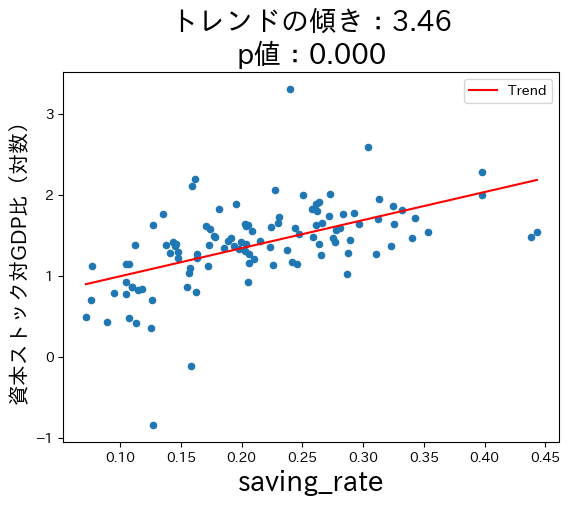

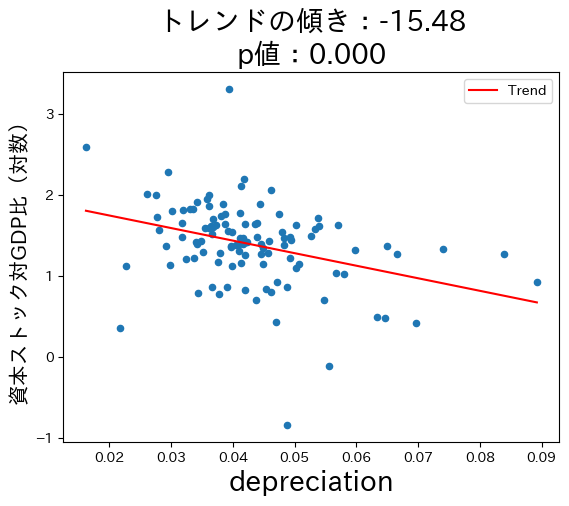

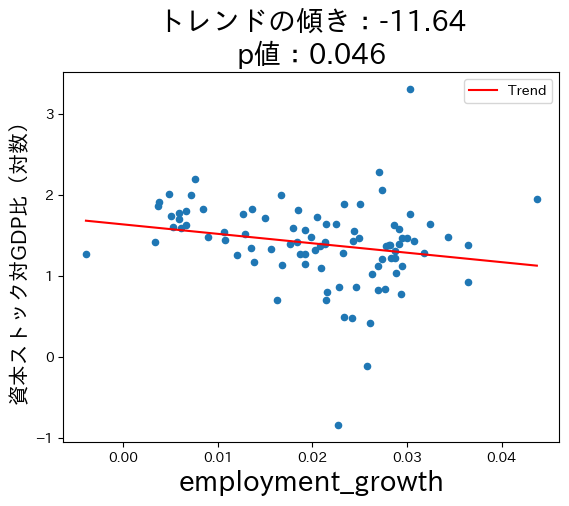

In [34]:
for var in ky_ratio.columns[-3:]:              #1
    
    df_tmp = ky_ratio.copy()                   #2
    res = smf.ols(f'ky_ratio ~ {var}',         #3
                  data=df_tmp).fit()           #4
    bhat = res.params.iloc[1]                  #5
    pval = res.pvalues.iloc[1]                 #6
    
    df_tmp['Trend'] = res.fittedvalues         #7

    ax = df_tmp.plot.scatter(x=var, y='ky_ratio') #8
    
    df_tmp.sort_values('Trend').plot(x=var,    #9
                                     y='Trend', 
                                     color='red',
                                     ax=ax)
    ax.set_title(f'トレンドの傾き：{bhat:.2f}\n'  #10
                 f'p値：{pval:.3f}', size=20)   #11
    ax.set_ylabel('資本ストック対GDP比（対数）',   #12
                  size=15)                     #13
    ax.set_xlabel(f'{var}', size=20)           #14

```{admonition} コードの説明
:class: dropdown

* `#1`：`ky_ratio`の最後の３列のラベルに対して`for`ループを組んで，`var`はその列ラベルを指す。
* `#2`：`ky_ratio`のコピーを作り`df_tmp`に割り当てる。`.copy()`は実態としては別物のコピーを作成する。詳細は割愛するが`.copy()`がないと実態は同じで参照記号のみが異なることになり，予期しない結果につながることを防ぐために`.copy()`を使っている。
* `#3`：回帰分析をおこなっているが，`f-string`を使い回帰式の説明変数を指定している。また回帰分析の結果を`res`に割り当てている。
* `#4`：`data`で回帰分析のデータの指定をおこない，`.fit()`で自動計算！
* `#5`：`res`の属性`.params`は推定値を２つ返すが，1番目に傾きの推定値が格納されているため`.iloc[1]`で抽出し，`bhat`に割り当てている。
* `#6`：`res`の属性`.pvalues`は$p$値を２つ返すが，1番目に傾きの$p$値が格納されているため`.iloc[1]`で抽出し，`pval`に割り当てている。
* `#7`：`res`の属性`fittedvalues`は予測値を返すが，それを新たな列（ラベルは`Trend`）として`df_tmp`に追加している。
* `#8`：`df_tmp`を使い横軸は`var`，縦軸は`ky_ratio`の散布図を表示し、その軸を`ax`に割り当てる。
* `#9`：`df_tmp`を使い横軸は`var`，縦軸は`ky_ratio`の回帰直線を表示。その際、メソッド`.sort_values('Trend')`で列`Trend`に従って昇順に並び替える。これはトレンド線が正確に表示されるために必要。
* `#10`：図のタイトルを設定する。
    * `f-string`を使い`bhat`の値を代入する。
    * `:.2f`は小数点第２位までの表示を指定。
    * `\n`は改行の意味。
    * 行を変えるので`\n`の後に`'`が必要となる。
* `#11`：`f-string`を使い`pval`の値を代入する。`:.3f`は小数点第３位までの表示を指定し，`size=20`はフォントの大きさの指定。
* `#12`：縦軸のラベルの設定。
* `#13`：フォントの大きさの指定。
* `#14`：横軸のラベルの設定であり，`f-string`を使い`var`の値を代入している。`size=20`はフォントの大きさの指定。
```

３つの図からソロー・モデルの理論的予測はデータと整合性があることが確認できる。ここで注意する点が一つある。式[](eq:8-kyratio)は因果関係を予測している。例えば，貯蓄率が高くなることにより長期的な一人
当たりGDPは増加する。一方，トレンド線は因果関係を示しているのではなく単なる相関関係を表している。ソロー・モデルの因果関係を計量経済学的に検討するにはさまざまな要因の検討が必要になり，本章の域を超える事になる。